_You can use this as a guide. I tried to make it general, but as each project has its own peculiarity you'll have to deal with that and adapt. Change the code, make it yours._

> **1.0 - Describe Data - Data cleaning.**
>
> **2.0 - Create Hypothesis to validate with data (future insights).**
>
> **3.0 - Feature Engineering - "Data Exploration" (Feature Extraction/ Construction/ Selection... Feature Learning).**
>
> **4.0 - EDA (Exploratory Data Analysis) - Finding out Insights/ Answers to business questions.**
>
> **5.0 - Machine Learning (if needed)**

## Agenda

    1.0 Describe Data
        1.1 Rename Columns
        1.2 Dealing with Missing Values
        1.3 Remap values
        1.4 Change Data Types
        1.5 Duplicates
        1.6 Descriptive Statistical
            1.6.1. Numerical Attributes
            1.6.2. Categorical Attributes
    2.0 Hypothesis Creation
        2.1 Hypothesis
    3.0 Feature Engineering
        3.0.1. new_column_name_1
        3.0.2. new_column_name_2
    4.0 Filtering The Features
        4.1 Column Selection
        4.2 Row Selection
    5.0 Exploratory Data Analysis
        5.1 Univariate Analysis
            5.1.1. Response Variable
            5.1.2. Numerical Variables
            5.1.3. Categorical Variables
        5.2 Bivariate Analysis
        5.3 Multivariate Analysis
            5.3.1. Numerical Attributes
            5.3.2. Categorical Attributes

### 0.0 Imports

In [45]:
import pandas as pd
import inflection
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# util
from IPython.display import Image
from scipy import stats

### 0.1 Helper Functions

In [3]:
def describe_data(data):
    print(f"Shape: {data.shape}")
    print(f"Duplicates: {data.duplicated().any()}")
    
    is_na = data.isna().sum()
    is_na_percentage = data.isna().sum()/data.shape[0]*100
    nan_data_frame = pd.concat([data.dtypes, is_na, is_na_percentage], axis=1)
    nan_data_frame.columns = ['data_types', 'nan_count', 'nan_percentage']
    #display(nan_data_frame)
    return nan_data_frame


# 1.2 Dealing with Missing Values
def missing_plot(data, nan_cols, no_nan_col, x=15, y=5, first_graph=True, second_graph=True):
    nan_cols.insert(0, no_nan_col)
    try:
        if first_graph:
            msno.matrix(data[nan_cols], figsize=(x, y))
            plt.show()
        if second_graph:
            msno.bar(data[nan_cols], figsize=(x, y))
            plt.show()
    except Exception as e:
        print(e)
    
    
# 5.1.3. Categorical Variables    
def get_categories(data):
    df = pd.DataFrame()
    for column in data.columns:
        col = pd.Series(data[column].unique(), name=column)
        df = pd.concat([df, col], axis=1).fillna('')
    return df


# 5.3 Multivariate Analysis 
#  5.3.2. Categorical Attributes
def cramer_v( x, y ):
    confusion_matrix = pd.crosstab( x, y ).to_numpy() 
    n = confusion_matrix.sum()
    r, k = confusion_matrix.shape
    
    chi2 = stats.chi2_contingency( confusion_matrix )[0]
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )


def get_categorical_corr(categorical_data):
    categorical_correlation_matrix = {}

    for column in categorical_data.columns:
        correlation_values = []
        for col in categorical_data.columns:
            correlation_values.append(cramer_v(categorical_attributes[column], categorical_attributes[col]))

        categorical_correlation_matrix[column] = correlation_values
    
    categorical_corr = pd.DataFrame(categorical_correlation_matrix)
    categorical_corr = categorical_corr.set_index( categorical_corr.columns )
    return categorical_corr 

### 0.2 Loading Data

In [4]:
raw_data = pd.read_csv("data/churn.csv")#.drop(columns="ID")
raw_data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


## 1.0 Describe Data

In [5]:
data = raw_data.copy()

### 1.1 Rename Columns
[inflection docs](https://inflection.readthedocs.io/en/latest/) &emsp; [lambda](https://www.w3schools.com/python/python_lambda.asp) &emsp; [map](https://www.geeksforgeeks.org/python-map-function/)

In [6]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
old_columns = data.columns

# transform snakecase with inflection
snakecase = lambda x: inflection.underscore(x)
new_columns = map(snakecase, old_columns)

data.columns = new_columns
data.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

> **Data Dimension. Data Types. Check NaN.**

In [8]:
describe_data(data)#.T

Shape: (10000, 14)
Duplicates: False


,data_types,nan_count,nan_percentage
row_number,int64,0,0.0
customer_id,int64,0,0.0
surname,object,0,0.0
credit_score,int64,0,0.0
geography,object,0,0.0
gender,object,0,0.0
age,int64,0,0.0
tenure,int64,0,0.0
balance,float64,0,0.0
num_of_products,int64,0,0.0


### 1.2 Dealing with Missing Values

In [ ]:
missing_plot(data, nan_cols, "column_with_no_nan")

In [ ]:
# Drop
data.dropna(inplace=True)

# Fill (mean, median, etc...)
data['column_name'].fillna('value_returned_by_function', inplace=True)

# Fill (with some specification)
data['column_name'] = data.apply(lambda x: 'x + value?' if "condition" else "x itself or other value")

### 1.3 Remap values

[replace](https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict)

In [ ]:
# map
dict_map = {1: 'example_1',  2: 'example_2',  3: 'example_3'}
data['column_name'].map( dict_map )

# replace (map is faster)
data['column_name'].replace("original_value", 'new_value')

### 1.4 Change Data Types

[Other Ways](https://stackoverflow.com/questions/15891038/change-column-type-in-pandas)

In [ ]:
describe_data(data)

In [ ]:
# YES, APPLY BOOLEAN WAY OF LIFE
data['column_name'] = data['column_name'].astype('bool')

In [ ]:
data['column_name'] = data['column_name'].astype( int )

In [ ]:
describe_data(data)

### 1.5 Duplicates

In [ ]:
# Duplicated rows
print("number of duplicates: ", data.duplicated().sum())
duplicated_rows_df = data[data.duplicated(keep=False)]
duplicated_rows_df.sort_values("year_birth").head()

In [ ]:
data.drop_duplicates(inplace=True)

### 1.6 Descriptive Statistical

In [9]:
numerical_attributes = data.select_dtypes( include=['int64', 'float64'] )
categorical_attributes = data.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

#### 1.6.1. Numerical Attributes

        Explanation

In [10]:
skew = pd.DataFrame(numerical_attributes.apply(lambda x: x.skew()), columns=['skew']).T
kurtosis = pd.DataFrame(numerical_attributes.apply(lambda x: x.kurtosis()), columns=['kurtosis']).T
stats = pd.concat([data.describe(), skew, kurtosis]).round(2).T

def style_specific_cell(x):
    df = pd.DataFrame('', index=x.index, columns=x.columns)
    
    df.iloc[1, 2] = 'background-color: lightyellow'
    df.iloc[5, 0] = df.iloc[5, 4] = 'background-color: lightblue'
    df.iloc[0:5, 0] = 'background-color: lightgrey'   
    
    return df

stats.drop(columns='count').style.apply(style_specific_cell, axis=None).format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
row_number,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00,0.000000,-1.200000
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00,0.001149,-1.196113
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00,-0.071607,-0.425726
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00,1.011320,1.395347
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00,0.010991,-1.165225
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09,-0.141109,-1.489412
num_of_products,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00,0.745568,0.582981
has_cr_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00,-0.901812,-1.186973
is_active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00,-0.060437,-1.996747
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48,0.002085,-1.181518


#### 1.6.1.2 Adjustments

    if needed

#### 1.6.2. Categorical Attributes

        Explanation

In [11]:
categorical_attributes.apply( lambda x: x.unique().shape[0] )

surname      2932
geography       3
gender          2
dtype: int64

In [ ]:
# numerical_attributes.select_dtypes(include=['int64','float64'], exclude=['bool']).columns # Try this first

numerical_columns = []
for column in numerical_attributes.columns:
    if numerical_attributes[column].nunique() > 2:
        numerical_columns.append(column)
len(numerical_columns)

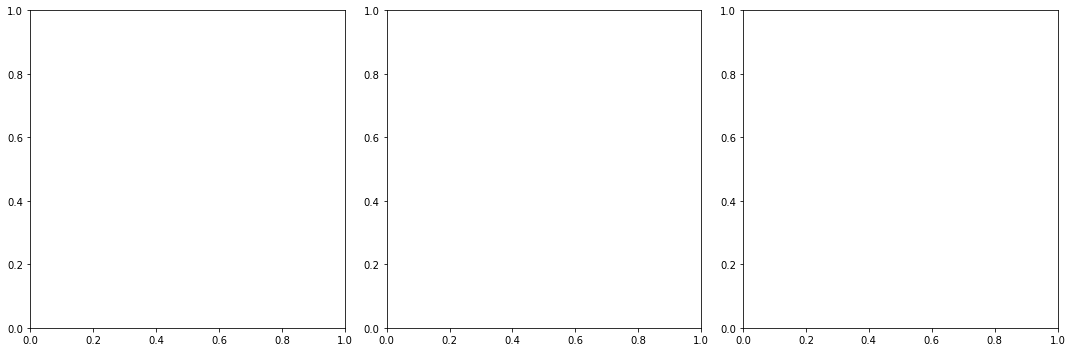

In [185]:
rows = len(numerical_columns); columns = categorical_attributes.shape[1]; plot = 0

for n_attribute in numerical_columns:
    plt.figure(figsize=(15,20))
    plot += 1
    plt.subplot( rows, columns, plot )
    sns.boxplot( x='categorical_attribute_1', y = n_attribute, data=data )
    plot += 1
    plt.subplot( rows, columns, plot )
    sns.boxplot( x='categorical_attribute_2', y = n_attribute, data=data )
    
    print("\n\n"); plt.show()

## 2.0 Hypothesis Creation

Hypothesis Mind Map: [coggle.it](https://coggle.it/)

In [ ]:
Image( 'img/MindMapHypothesis.png' )

### 2.1 Hypothesis

#### 2.1.1. ['column_name'] hypothesis.

**1.** hypothesis

**2.** hypothesis

**3.** hypothesis

**4.** hypothesis

#### 2.1.2. ['column_name_2'] hypothesis.

**1.** hypothesis

**2.** hypothesis

**3.** hypothesis

**4.** hypothesis

#### 2.1.3. ['column_name_3'] hypothesis.

**1.** hypothesis

**2.** hypothesis

**3.** hypothesis

**4.** hypothesis



## 3.0 Feature Engineering

In [12]:
data_frame = data.copy()

#### 3.0.1. new_column_name_1

In [ ]:
data_frame['new_column'] = ''' data_frame['column'] + - * / condition column to create new column'''

#### 3.0.2. new_column_name_2

## 4.0 Filtering The Features

In [ ]:
df = data_frame.copy()
df.head(3)

### 4.1 Final Modifications... if needed

### 4.2 Column Selection

In [ ]:
drop_columns = ['column_name','column_name','column_name','column_name']
df.drop(columns=drop_columns, inplace=True)

### 4.3 Row Selection

In [ ]:
df = df[(df['column_name'] CONDITION) ]

#df.query("")

## 5.0 Exploratory Data Analysis

In [14]:
challengeName_data = df.copy()

temporary_desc = describe_data(challengeName_data)
temporary_desc

In [ ]:
temporary_desc['data_types'].unique()

In [15]:
numerical_attributes = challengeName_data.select_dtypes( include=['int64', 'float64'] )
categorical_attributes = challengeName_data.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

### 5.1 Univariate Analysis

#### 5.1.1. Response Variable

In [ ]:
sns.distplot(challangeName_data['y_column'])

In [ ]:
# Normalization (search about it)
sns.distplot( np.log1p(challangeName_data['y_column']) )

#### 5.1.2. Numerical Variables

    Explain them here. What do you see. What do they tell you...

In [ ]:
plt.figure(figsize=(16,16))
for column, subplot in zip(numerical_attributes, range(len(numerical_attributes))):
    plt.subplot(4, 3, subplot+1)
    sns.distplot( numerical_attributes[column], kde=False )
    plt.xlabel(column,fontsize=14); plt.xticks(fontsize=12)
plt.tight_layout()

#### 5.1.3. Categorical Variables

    sns.countplot() and sns.kdeplot()
    
    column_name according to categorical columns.

In [ ]:
get_categories(categorical_attributes)

In [ ]:
# For Regression Problems (continuous response_variable - y)

# categorical attribute 1
plt.subplot( 2, 2, 1 )
sns.countplot(cat_attributes['column_name'])

plt.subplot( 2, 2, 2 )
sns.kdeplot(challangeName_data[challangeName_data['column_name'] == 'category_1']['response_variable'], label='label_1', shade=True)
sns.kdeplot(challangeName_data[challangeName_data['column_name'] == 'category_2']['response_variable'], label='label_2', shade=True)
sns.kdeplot(challangeName_data[challangeName_data['column_name'] == 'category_3']['response_variable'], label='label_3', shade=True)

# categorical attribute 2
plt.subplot(2, 2, 3 )
sns.countplot(challangeName_data['column_name_1'])

plt.subplot( 2, 2, 4 )
sns.kdeplot(challangeName_data[challangeName_data['column_name_1'] == 'category_1']['response_variable'], label='label_1', shade=True)
sns.kdeplot(challangeName_data[challangeName_data['column_name_1'] == 'category_2']['response_variable'], label='label_2', shade=True)
sns.kdeplot(challangeName_data[challangeName_data['column_name_1'] == 'category_3']['response_variable'], label='label_3', shade=True)
plt.tight_layout()

In [ ]:
# For Cassification Problems 

plt.figure(figsize=(10,8))

# categorical attribute 1
plt.subplot( 2, 2, 1 )
sns.countplot(challangeName_data['column_name'])

plt.subplot( 2, 2, 2 )
sns.countplot(x='response_variable', hue='column_name', data=challangeName_data)

# categorical attribute 2
plt.subplot( 2, 2, 3 )
sns.countplot(challangeName_data['column_name_1'])

plt.subplot( 2, 2, 4 )
sns.countplot(x='response_variable', hue='column_name_1', data=challangeName_data)
plt.tight_layout()

### 5.2 Bivariate Analysis

    Your Pandas knowledge will help you while validating the hypotheses, 
    since you have to manipulate the data (groupy, join, cut...) to create
    insights (graphs are welcome).
    
    New questions (hypotheses) are going to pop up in your mind, make sure
    to look for answers and try to listen to the story the data tells you.

In [ ]:
df = challangeName_data

#### _1. hypothesis._
                
> **Most valuable part of the answer**
>
> More information <br>
> or maybe a thought <br>
> (if needed).

**_Financial question... How does this affects the company, in terms of revenue?_**

        Maybe some explanation.

> **Most valuable part of the answer**
>
> More information <br>
> or maybe a thought <br>
> (if needed).

In [ ]:
columns_used = ['column1', 'column2']
sns.heatmap( ifood[columns_used].corr( method='pearson' ), annot=True );

### 5.3 Multivariate Analysis

In [ ]:
numerical_attributes = challangeName_data.select_dtypes( include=['int64', 'float64'] )
categorical_attributes = challangeName_data.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

#### 5.3.1. Numerical Attributes

In [ ]:
plt.figure(figsize=(24, 12))
correlations = numerical_attributes.corr().round(2)
mask = np.triu(np.ones_like(correlations, dtype=np.bool))
sns.heatmap(correlations, mask=mask, linewidths=1, annot=True, cmap=['#F2F2F0','#1F375D'], vmin=0.40) #vmax=-0.40
plt.show()

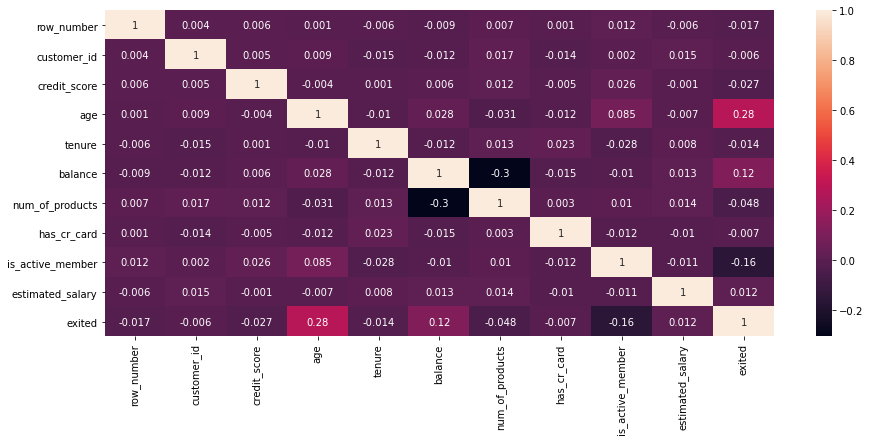

In [35]:
plt.figure(figsize=(15, 6))
sns.heatmap(numerical_attributes.corr().round(3), annot=True )
plt.show()

#### 5.3.2. Categorical Attributes

[Cramer's v](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)

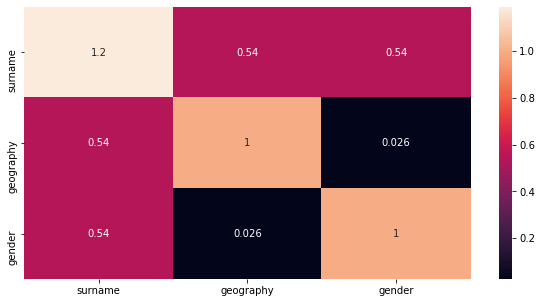

In [107]:
categorical_corr = get_categorical_corr(categorical_attributes)
plt.figure(figsize=(10, 5))
sns.heatmap( categorical_corr, annot=True )
plt.show()

_**If you made it here, you already have insights that will help your business being successful. From here, you can go even further and start working on the machine learning to create a predictive solution (if needed).**_